# Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции

Данное задание основано на материалах секции, посвященной оптимизационным задачам и методам их решения. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy, SciPy и Matplotlib.

### Вы научитесь:
1. применять библиотеку SciPy для минимизации функций
2. делать выбор между градиентными и неградиентными методами оптимизации, исходя из особенностей задачи и ваших пожеланий к итоговому решению

### Введение
В этом задании вы научитесь решать задачи оптимизации с помощью библиотеки SciPy. Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.

### Материалы
1. Справка по функциям пакета scipy.optimize: http://docs.scipy.org/doc/scipy/reference/optimize.html
2. Matplotlib User Guide: http://matplotlib.org/users/index.html

### Инструкция по выполнению
Данное задание состоит из трех частей. В каждой ответом будет набор чисел, сохраните его. Правильные ответы оглашу 14 декабря)

## Задача 1. Минимизация гладкой функции
1. Рассмотрим функцию: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), на промежутке [1, 30]
2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.
3. Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.
4. Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")
5. Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.
6. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.
7. Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.
8. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize
from scipy.optimize import differential_evolution

# Task 1. Minimizing smooth function

In [2]:
#1-3 Function: f (x) = sin (x / 5) * exp (x / 10) + 5 * exp (-x / 2), on the interval [1, 30]

def f(x):
    return  np.sin(x/5.0) * np.exp(x/10.0) + 5.0*np.exp(-x/2.0)

def discretize(function, x_min, x_max, points):
    '''
    function discretization
    discrete_arguments - x_min - first argument, x_max - last argument, points - number of plot points
    '''
    discrete_arguments = np.linspace(x_min, x_max, num=points)
    discrete_function = [f(x_element) for x_element in discrete_arguments]
    return [discrete_arguments, discrete_function]
    
# Discrete function
discrete_f = discretize(f, 1, 30, 100)

In [3]:
# 4-5 Try to find the minimum using the standard parameters in the scipy.optimize.minimize function 
# Try changing the initial approximation and examine whether the result is changing.

# Minimizing for different inital approximations
minimize_f = [optimize.minimize(f, [initial_value]).fun for initial_value in np.linspace(1, 30, num=100)]

print('The minimum value depends on the initial value')

The minimum value depends on the initial value


In [4]:
# 6-7 Specify scipy.optimize.minimize as the BFGS method, run x = 2, 30 from the initial approximation. 
# The obtained value of the function at the minimum point is your first answer for task 1,
# it must be written with an accuracy of 2 decimal places.

# Mininun by BFGS
inital_values = [2, 30]
minimize_f_bfgs = [optimize.minimize(f, [inital_value], method='BFGS').fun for inital_value in inital_values]

# Result printing (f'{value:{width}.{precision}}')
[print(f'Minimun by BSFG (inital: x = {inital_value}) -> {minimize_f_bfgs[index]:.2f}')\
for index, inital_value in enumerate(inital_values)];

Minimun by BSFG (inital: x = 2) -> 1.75
Minimun by BSFG (inital: x = 30) -> -11.90


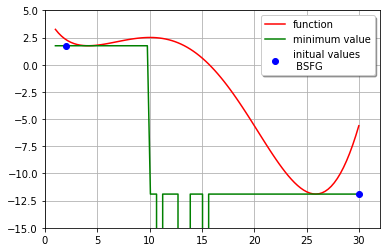

In [5]:
# 8 Result analys
fig, axs = plt.subplots()

axs.plot(discrete_f[0], discrete_f[1], 'r', label="function")
axs.plot(discrete_f[0], minimize_f, 'g', label="minimum value")
axs.plot(inital_values, minimize_f_bfgs, 'bo', label="initual values \n BSFG")

axs.grid(True)
axs.set_xlim(0, 32)
axs.set_ylim(-15, 5)
legend = axs.legend(loc='best', shadow=True)

plt.show()

## Задача 2. Глобальная оптимизация
1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.
2. Изучите документацию и примеры использования функции scipy.optimize.differential_evolution.
3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.
4. Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.
5. Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.
6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

In [6]:
# 4 Start the search for the minimum of the function f (x) using differential evolution on the interval [1,30].
# Write it down to the second decimal place

bounds = [(1, 30)]
minimum_global_de = differential_evolution(f, bounds)

print(f' Global function minimun by Diff.Evolution -> {minimum_global_de.fun[0]:.2f}',\
      f'\n x value of function -> {minimum_global_de.x[0]:.2f}')

 Global function minimun by Diff.Evolution -> -11.90 
 x value of function -> 25.88


In [7]:
#6 Compare the number of iterations required by the BFGS to find the minimum with a good initial approximation
# with the number of iterations required by the differential evolution

# Itarations for DE and BFGS
iterations_minimum_global_de = minimum_global_de.nit
iterations_minimize_f_bfgs = optimize.minimize(f, [30], method='BFGS').nit
print(' Iterations: \n Differential evolution ->', iterations_minimum_global_de, '\n BSFG ->', iterations_minimize_f_bfgs)

# Count operations in one iteration
operations_minimum_global_de = minimum_global_de.nfev
operations_minimize_f_bfgs = optimize.minimize(f, [30], method='BFGS').nfev
print('\n Operations in: \n Differential evolution -> ', operations_minimum_global_de,\
      '\n BSFG -> ', operations_minimize_f_bfgs)

 Iterations: 
 Differential evolution -> 5 
 BSFG -> 6

 Operations in: 
 Differential evolution ->  96 
 BSFG ->  21


## Задача 3. Минимизация негладкой функции
1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.
3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.
5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).
6. Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

In [8]:
#1 Function h(x) = int(f(x)) on the same interval [1,30], now each value of f (x) changed to type int 
# and the function takes only integer values

def f_int(x):
    return  int(np.sin(x/5.0) * np.exp(x/10.0) + 5.0*np.exp(-x/2.0))

def discretize_int(function, x_min, x_max, points):
    '''
    function discretization
    discrete_arguments - x_min - first argument, x_max - last argument, points - number of plot points
    '''
    discrete_arguments = np.linspace(x_min, x_max, num=points)
    discrete_function = [f_int(x_element) for x_element in discrete_arguments]
    return [discrete_arguments, discrete_function]

# Discrete function
discrete_f_int = discretize_int(f, 1, 30, 1000)

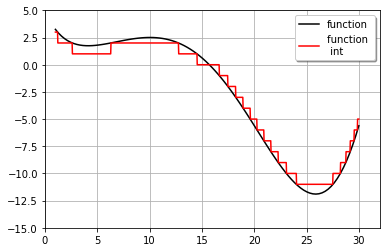

In [9]:
#2 Plot result graphic for int and float values
fig, axs = plt.subplots()

axs.plot(discrete_f[0], discrete_f[1], 'k', label="function")
axs.plot(discrete_f_int[0], discrete_f_int[1], 'r', label="function \n int")
axs.grid(True)
axs.set_xlim(0, 32)
axs.set_ylim(-15, 5)
legend = axs.legend(loc='best', shadow=True)

plt.show()

In [10]:
#3 Minimum of the function h(x) using the BFGS, taking x = 30 as the initial approximation
minimize_f_int_bfgs = optimize.minimize(f_int, [30], method='BFGS').fun

#4 Minimum h(x) on the interval [1,30] using differential evolution
minimize_f_int_de = differential_evolution(f_int, bounds).fun

print(' Minimum: \n BSFG -> ', minimize_f_int_bfgs, '\n Differential evolution -> ', minimize_f_int_de)

 Minimum: 
 BSFG ->  -5 
 Differential evolution ->  -11.0


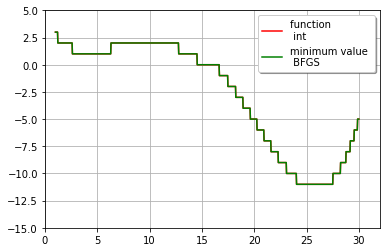

The minimum values coincide with the values of the piecewise function


In [11]:
# 5 Try to understand why the minimum, found by BFGS, is false
# (perhaps this will help you with a choice of different initial approximations)

# Minimizing by BFGS for different inital approximations
list_minimize_f_int_bfgs = [optimize.minimize(f_int, [initial_value], method='BFGS').fun\
                            for initial_value in np.linspace(1, 30, num=1000)]

# Result analys
fig, axs = plt.subplots()

axs.plot(discrete_f_int[0], discrete_f_int[1], 'r', label="function \n int")
axs.plot(discrete_f_int[0], list_minimize_f_int_bfgs, 'g', label="minimum value \n BFGS")

axs.grid(True)
axs.set_xlim(0, 32)
axs.set_ylim(-15, 5)
legend = axs.legend(loc='best', shadow=True)

plt.show()

print('The minimum values coincide with the values of the piecewise function')